DESCRIPTION
Objective: Make a model to predict the app rating, with other information about the app provided.
Problem Statement:
Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.
Domain: General
Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.
Content: Dataset: Google Play Store data (“googleplaystore.csv”)
Fields in the data –
	• App: Application name
	• Category: Category to which the app belongs 
	• Rating: Overall user rating of the app
	• Reviews: Number of user reviews for the app
	• Size: Size of the app
	• Installs: Number of user downloads/installs for the app
	• Type: Paid or Free
	• Price: Price of the app
	• Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
	• Genres: An app can belong to multiple genres (apart from its main category). For example, a musical family game will belong to Music, Game, Family genres.
	• Last Updated: Date when the app was last updated on Play Store
	• Current Ver: Current version of the app available on Play Store
	• Android Ver: Minimum required Android version
 
Steps to perform:
	1. Load the data file using pandas. 
	2. Check for null values in the data. Get the number of null values for each column.
	3. Drop records with nulls in any of the columns. 
	4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
		1. Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
			1. Extract the numeric value from the column
			2. Multiply the value by 1,000, if size is mentioned in Mb
		2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
		3. Installs field is currently stored as string and has values like 1,000,000+. 
			1. Treat 1,000,000+ as 1,000,000
			2. remove ‘+’, ‘,’ from the field, convert it to integer
		4. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.
5. Sanity checks:
	1. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
	2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
	3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.
5. Performing univariate analysis: 
	• Boxplot for Price
		○ Are there any outliers? Think about the price of usual apps on Play Store.
	• Boxplot for Reviews
		○ Are there any apps with very high number of reviews? Do the values seem right?
	• Histogram for Rating
		○ How are the ratings distributed? Is it more toward higher ratings?
	• Histogram for Size
Note down your observations for the plots made above. Which of these seem to have outliers?
 
6. Outlier treatment: 
	1. Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
		1. Check out the records with very high price
			1. Is 200 indeed a high price?
		2. Drop these as most seem to be junk apps
	2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.
	3. Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
		1. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
		2. Decide a threshold as cutoff for outlier and drop records having values more than that
7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.
	1. Make scatter plot/joinplot for Rating vs. Price
		1. What pattern do you observe? Does rating increase with price?
	2. Make scatter plot/joinplot for Rating vs. Size
		1. Are heavier apps rated better?
	3. Make scatter plot/joinplot for Rating vs. Reviews
		1. Does more review mean a better rating always?
	4. Make boxplot for Rating vs. Content Rating
		1. Is there any difference in the ratings? Are some types liked better?
	5. Make boxplot for Ratings vs. Category
		1. Which genre has the best ratings?
For each of the plots above, note down your observation.
8. Data preprocessing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
	1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.
	2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
	3. Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.
9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.
10. Separate the dataframes into X_train, y_train, X_test, and y_test.
11 . Model building
	• Use linear regression as the technique
	• Report the R2 on the train set
12. Make predictions on test set and report R2.


# Purpose:
Predict which apps will have high ratings

# Obtain Data

In [1]:
# import pandas library
import pandas as pd
import numpy as np
# Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Explore & Clean Data
Check for null values in the data. Get the number of null values for each column.


# Step 1
Load the data file using pandas

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
# Determine the shape of the data.
df.shape

(10841, 13)

In [4]:
# show the top rows of the dataframe
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Show the column names
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
# Note that some column titles consist of two seperate words. For further analysis it's more convenient
# to have column names which are single words.
df.columns = [s.strip().replace(' ', '_') for s in df.columns]
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

# Step 2
Check for null values in the data.

In [7]:
df.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content_Rating     True
Genres            False
Last_Updated      False
Current_Ver        True
Android_Ver        True
dtype: bool

Get the number of null values for each column.

In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

# Step 3
Drop records with nulls in any of the columns.

In [9]:
# Get the records before and after
df.shape

(10841, 13)

In [10]:
# Define newdf and assign records without null values.
newdf = df.dropna()

In [11]:
newdf.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

In [12]:
newdf.shape

(9360, 13)

In [13]:
# Show the data type of each column.
newdf.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
Last_Updated       object
Current_Ver        object
Android_Ver        object
dtype: object

# Step4 
Variables seem to have incorrect type and inconsistent formatting.

# Step 4.1
Size column has sizes in Kb as well as Mb. To analyze, convert these to numeric.

# Step 4.1.1
Extract numeric value from the column.

In [14]:
# Convert to string dtype from object.
newdf['Size'] = newdf.Size.astype('string')
newdf.Size

<ipython-input-14-5d0b463c0155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Size'] = newdf.Size.astype('string')


0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: string

In [15]:
# Capture indices with value 'Varies with device' (Vwd)
index_with_Vwd = newdf[newdf['Size'].str.contains('Varies')].index # This works
index_with_Vwd

Int64Index([   37,    42,    52,    67,    68,    73,    85,    88,    89,
               92,
            ...
            10647, 10679, 10681, 10707, 10712, 10713, 10725, 10765, 10826,
            10839],
           dtype='int64', length=1637)

In [16]:
# Drop records with indices in index_with_Vwd
newdf.drop(index=index_with_Vwd, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
# Reset Index: Indices no longer sequential
newdf = newdf.reset_index(drop=True)

In [18]:
# To verify indices being sequential, view index of dropped key, reset index and view results of previously dropped key. Results should be different.
newdf.loc[37]

App               Drawing Clothes Fashion Ideas
Category                         ART_AND_DESIGN
Rating                                      4.2
Reviews                                     117
Size                                        15M
Installs                                10,000+
Type                                       Free
Price                                         0
Content_Rating                         Everyone
Genres                             Art & Design
Last_Updated                      July 20, 2018
Current_Ver                               2.0.1
Android_Ver                        4.0.3 and up
Name: 37, dtype: object

In [19]:
# Find index with of values containing trailing M
index_with_M = newdf[newdf['Size'].str.contains('M')].index # This works


In [20]:
index_with_M

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7711, 7712, 7713, 7714, 7715, 7716, 7719, 7720, 7721, 7722],
           dtype='int64', length=7466)

In [21]:
# Strip trailing M using index_with_M values
def drop_M(indices):
        newdf['Size'] = [indices.strip().replace('M', '') for indices in newdf['Size']]
        return newdf.Size

In [22]:
#call method drop_M passing variable index_with_M
drop_M(index_with_M)

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
7718    619k
7719     2.6
7720      53
7721     3.6
7722      19
Name: Size, Length: 7723, dtype: object

In [23]:
# Find index with of values containing trailing K
index_with_k = newdf[newdf['Size'].str.contains('k')].index # This works
index_with_k

Int64Index([  53,  158,  273,  308,  314,  538,  543,  698, 1030, 1032,
            ...
            7616, 7617, 7618, 7626, 7628, 7652, 7667, 7672, 7717, 7718],
           dtype='int64', length=257)

In [24]:
# Strip trailing k from Size using index_with_k
def drop_k(indices):
        newdf['Size'] = [indices.strip().replace('k', '') for indices in newdf['Size']]
        return newdf.Size

In [25]:
#call method drop_k passing variable index_with_k
drop_k(index_with_k)

0        19
1        14
2       8.7
3        25
4       2.8
       ... 
7718    619
7719    2.6
7720     53
7721    3.6
7722     19
Name: Size, Length: 7723, dtype: object

In [26]:
# verify dropped indices; previous length was 9360
newdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7719,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
7720,Sya9a Maroc - FR,FAMILY,4.5,38,53,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
7721,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [27]:
# Convert column 'Size' to float
newdf['Size'] = newdf['Size'].astype('float')
newdf.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
        ...  
7718    619.0
7719      2.6
7720     53.0
7721      3.6
7722     19.0
Name: Size, Length: 7723, dtype: float64

# Step 4.1.2
Multiply the value by 1000 , if the size is mentioned in Mb.

In [28]:
# multiply values in index_with_M by 1000
def multiply_by_1000(indices):
    newdf['Size'] = [(indices * 1000) for indices in newdf.Size]
    return newdf.Size

In [29]:
multiply_by_1000(index_with_M)

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
7718    619000.0
7719      2600.0
7720     53000.0
7721      3600.0
7722     19000.0
Name: Size, Length: 7723, dtype: float64

# Step 4.2
Reviews is a numeric filed that is loaded as an object field. Convert it to numneric (int/float)

In [30]:
# Check shape of 'Reviews' feature
newdf['Reviews']

0          159
1          967
2        87510
3       215644
4          967
         ...  
7718        44
7719         7
7720        38
7721         4
7722    398307
Name: Reviews, Length: 7723, dtype: object

In [31]:
newdf['Reviews'] = pd.to_numeric(newdf['Reviews'])
newdf['Reviews']

0          159
1          967
2        87510
3       215644
4          967
         ...  
7718        44
7719         7
7720        38
7721         4
7722    398307
Name: Reviews, Length: 7723, dtype: int64

# Step 4.3
Installs field is currently stored as string and has values like 1,000,000+.

# Step 4.3.1/2
Treat 1,000,000+ as 1,000,000.
Remove + and , from field and convert to integer.

In [32]:
# Strip , and + from values.
newdf['Installs'] = [s.strip().replace(',', '') for s in newdf['Installs']]
newdf['Installs']

0          10000+
1         500000+
2        5000000+
3       50000000+
4         100000+
          ...    
7718        1000+
7719         500+
7720        5000+
7721         100+
7722    10000000+
Name: Installs, Length: 7723, dtype: object

In [33]:
# Remove trailing +
newdf['Installs'] = newdf['Installs'].str.rstrip('+')

In [34]:
newdf['Installs']

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
7718        1000
7719         500
7720        5000
7721         100
7722    10000000
Name: Installs, Length: 7723, dtype: object

In [35]:
# Convert to integer
newdf['Installs'] = newdf['Installs'].astype('int')
newdf['Installs']

0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
7718        1000
7719         500
7720        5000
7721         100
7722    10000000
Name: Installs, Length: 7723, dtype: int64

# Step 4.4
Price field is a string and has dollar sign symbol. Remove dollar sign and convert it to numeric

In [36]:
# Strip leading dollar sign symbol
newdf['Price'] = newdf['Price'].str.lstrip('$')

In [37]:
# Convert 'Price' to numeric datatype
newdf['Price'] = pd.to_numeric(newdf['Price'])
newdf['Price']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7718    0.0
7719    0.0
7720    0.0
7721    0.0
7722    0.0
Name: Price, Length: 7723, dtype: float64

Sanity checks: 

# Step 4.5.1
Average rating should be between 1 & 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

# Set AvgRating to mean of Rating feature.
AvgRating = newdf.Rating.mean()
AvgRating

newdf.App[10474]

# Drop any rows that have average rating outside of 1-5 range.
# Delete rows based on condition on a column.
# import numpy as np
import numpy as np
Rating_NaN = newdf
index_to_drop = newdf[(newdf.Rating < 1) | (newdf.Rating > 5)  | (newdf.Rating == )].index
index_to_drop

In [38]:
# Show current records in Rating
newdf.Rating

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
7718    4.8
7719    4.0
7720    4.5
7721    5.0
7722    4.5
Name: Rating, Length: 7723, dtype: float64

In [39]:
# Drop all NaN values from Rating column
newdf.dropna(subset=['Rating'])
newdf.Rating

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
7718    4.8
7719    4.0
7720    4.5
7721    5.0
7722    4.5
Name: Rating, Length: 7723, dtype: float64

From the transformation results above we see there were no NaN values in Rating column.

# Step 4.5.2
Reviews should not be more than installs as only those who installed can review the app. Drop any such records.

In [40]:
# Define and assign index_to_drop to the index values where reviews are greater than installs.
index_to_drop = newdf[(newdf.Reviews.astype('int') > newdf.Installs)].index
index_to_drop

Int64Index([1787, 4220, 4776, 5210, 6110, 7630], dtype='int64')

In [41]:
newdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7719,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
7720,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
7721,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [42]:
newdf.drop(index=index_to_drop, inplace=True)
newdf

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7719,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
7720,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
7721,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [43]:
# Reset Index: Indices no longer sequential
newdf = newdf.reset_index(drop=True)

# Step 4.5.3
For free apps (type='Free'), the price !> 0. Drop any such rows.

In [44]:
# Def and assign variable to hold the indice of free apps with price > 0
free_apps_to_drop = newdf[(newdf.Type == 'Free') & (newdf.Price > 0)].index
free_apps_to_drop

Int64Index([], dtype='int64')

From the result of the transformation above, there are no apps of type free with price > 0.

# Step 5
Performing univariate analysis:

In [45]:
%%capture
! pip install seaborn
! pip install ipympl

In [46]:
# Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#%matplotlib widget

<AxesSubplot:xlabel='Price', ylabel='Category'>

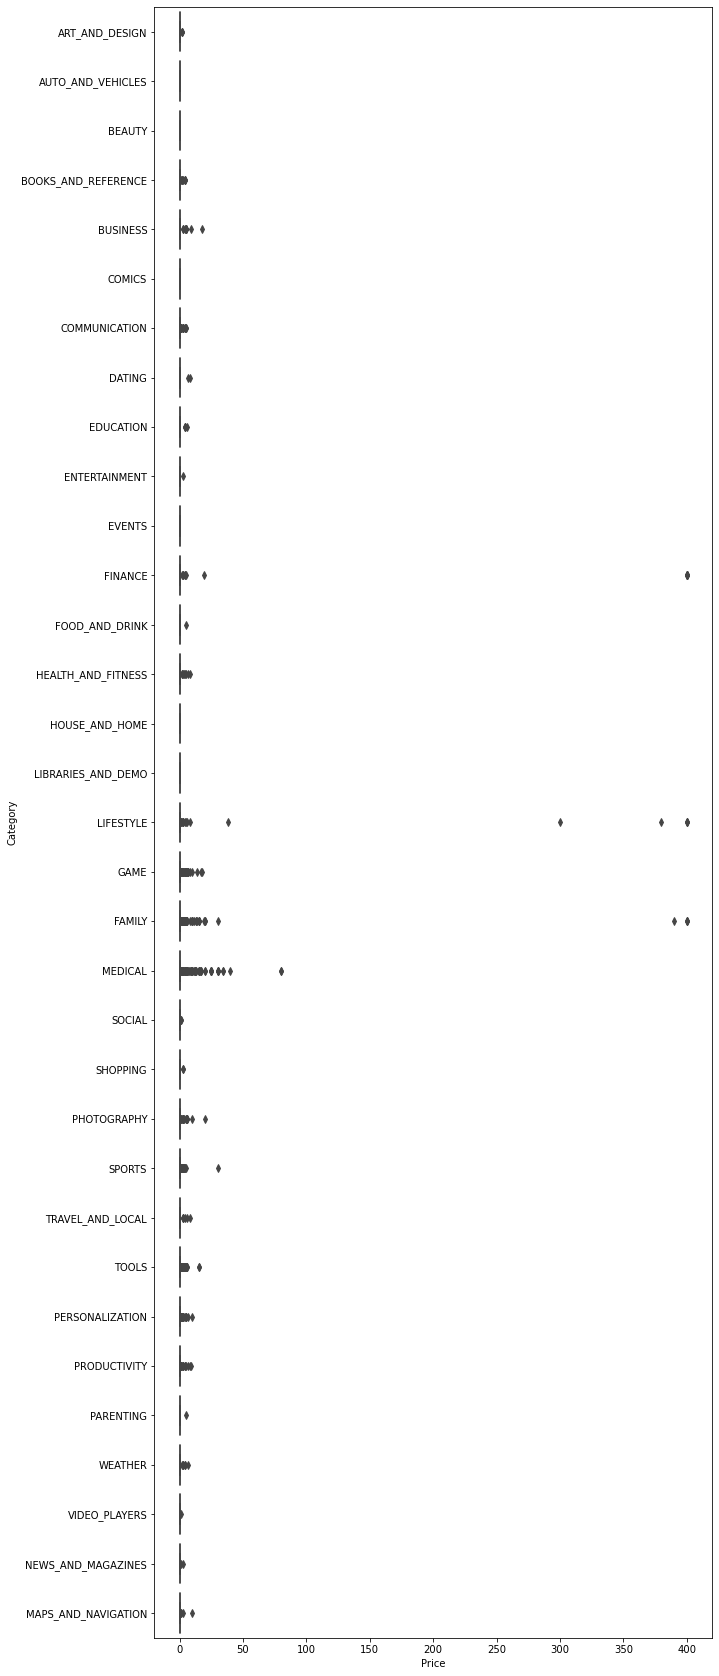

In [47]:
ax = plt.subplots(figsize=(10, 30))
sns.boxplot(x="Price", y="Category", data=newdf, orient='h')
#ax = plt.subplots(figsize=(70, 10))
#sns.boxplot(x="Category", y="Price", data=newdf)

<AxesSubplot:xlabel='Reviews', ylabel='Category'>

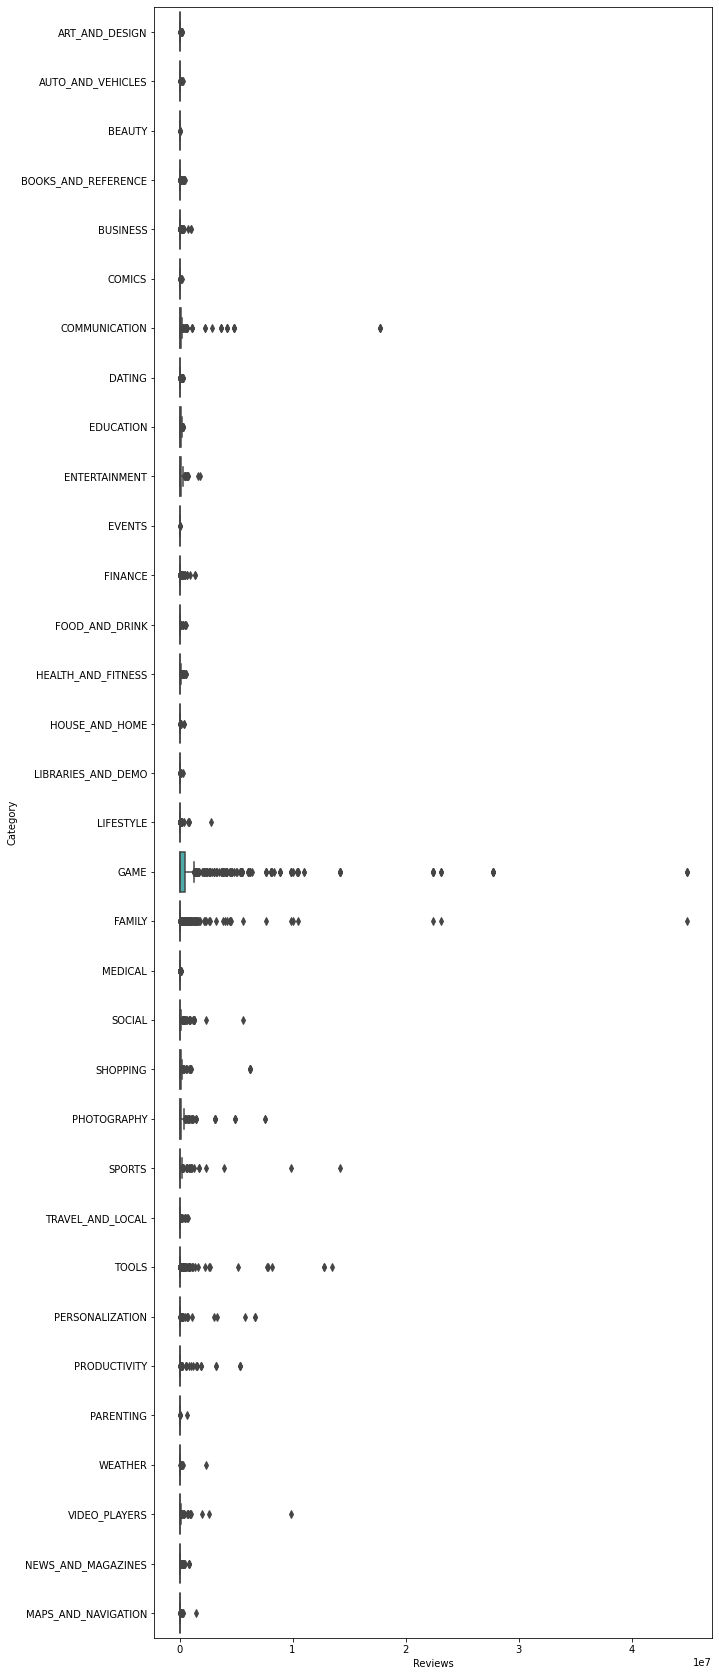

In [48]:
# Observing 'Category' as bins for Apps in order to better visualize the data.
ax = plt.subplots(figsize=(10, 30))
#sns.boxplot(x="Price", y="Category", data=newdf, orient='h')
sns.boxplot(x="Reviews", y="Category", data=newdf, orient='h')

In [49]:
from matplotlib import font_manager as fm, rcParams

plt.rcParams['font.sans-serif']=['DejaVu'] #Show Chinese label
plt.rcParams['axes.unicode_minus']=False   #These two lines need to be set manually




Text(0, 0.5, 'Occurrences')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


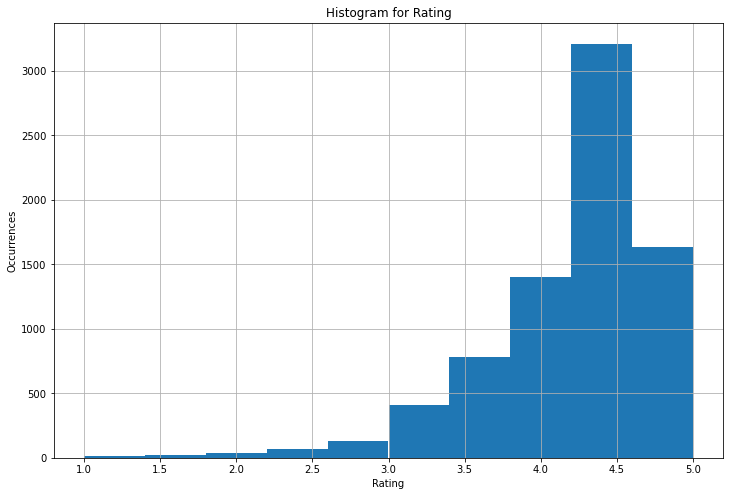

In [50]:
import pylab as pl
newdf.hist(column='Rating', sharex=True, sharey=True, figsize=(12, 8))
pl.title('Histogram for Rating')
pl.xlabel('Rating')
pl.ylabel('Occurrences')

Text(0, 0.5, 'Occurrences')

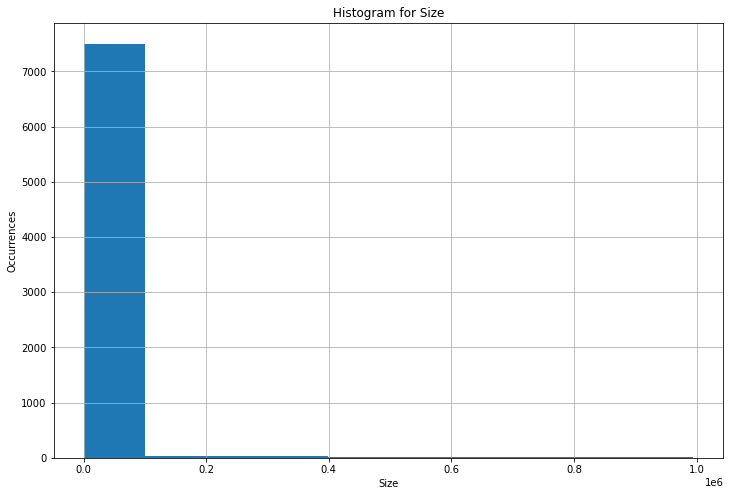

In [51]:
newdf.hist('Size', bins=10, figsize=(12,8))
pl.title('Histogram for Size')
pl.xlabel('Size')
pl.ylabel('Occurrences')

In [52]:
import numpy as np

In [53]:
# Define and set bins
bins = np.linspace(min(newdf['Size']), max(newdf['Size']), 4)

In [54]:
# Create a list with group name: Low, Medium, High
group_names = ['Low', 'Medium', 'High']

In [55]:
# Add created bins to dataframe
newdf['Size_binned'] = pd.cut(newdf['Size'], bins, labels=group_names, include_lowest=True)

array([[<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Medium'}>],
       [<AxesSubplot:title={'center':'High'}>, <AxesSubplot:>]],
      dtype=object)

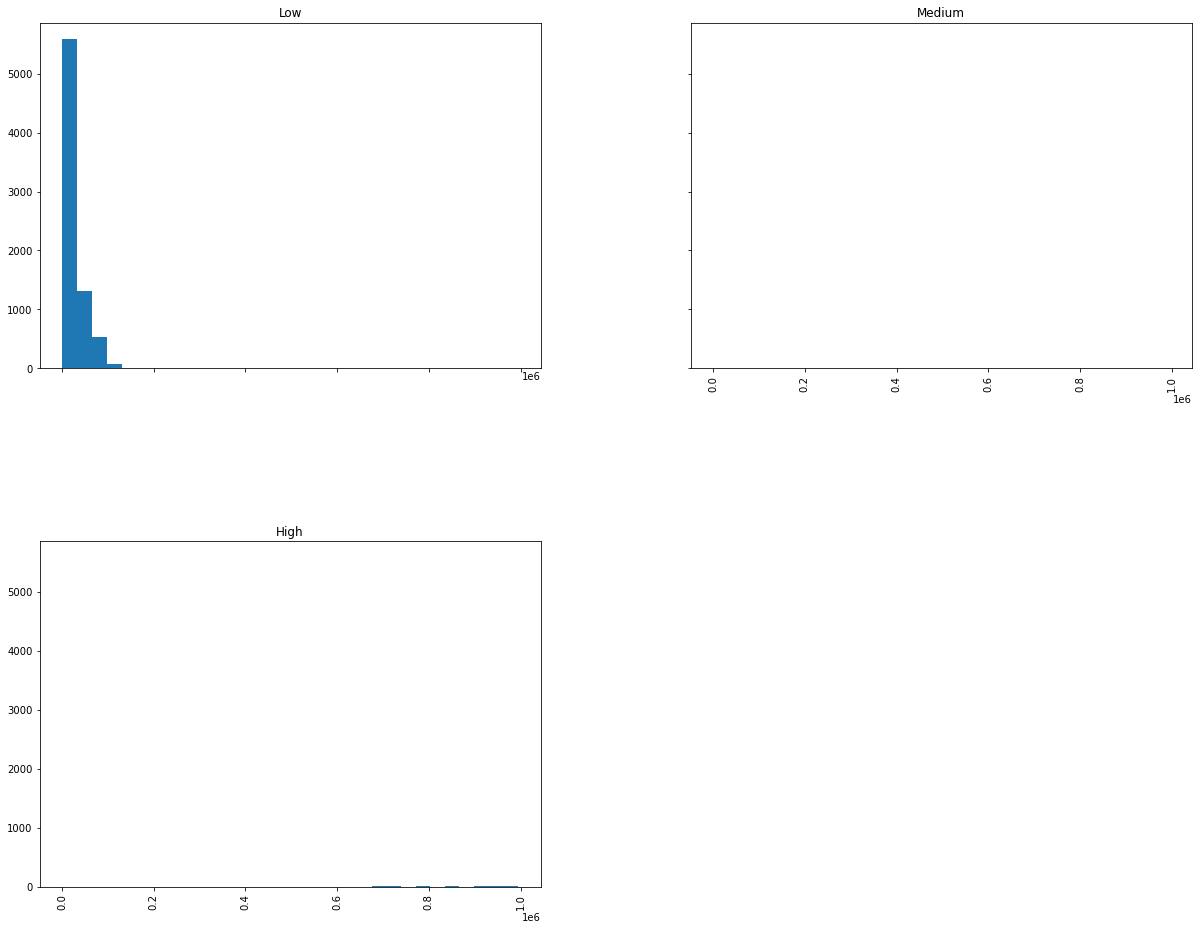

In [56]:
# Plot Size_binned using histogram
newdf.hist('Size','Size_binned', sharex=True, sharey=True, figsize=(20,16))

# Step 6
Outlier Treatment

# Step 6.1
Price: From the box plot, it seems like there are some apps with very high price. A price of 200 hundred dollars for an appliction on the Play Store is suspicious!


# Step 6.1.1
Check out the records with very high price.

In [57]:
# Find indices with price $200+
price_over_200_indices = newdf[newdf['Price'] >= 200].index
price_over_200_indices

Int64Index([2910, 3040, 3044, 3791, 3794, 3795, 3796, 3797, 3798, 3799, 3802,
            3804, 3806, 3809, 3813],
           dtype='int64')

# Step 6.1.1.1
Is 200 hundred dollars indeed a high price?

# Step 6.1.2
Drop records where price is >=200.

In [58]:
# Indices to be dropped
newdf[newdf['Price'] >= 200].index

Int64Index([2910, 3040, 3044, 3791, 3794, 3795, 3796, 3797, 3798, 3799, 3802,
            3804, 3806, 3809, 3813],
           dtype='int64')

In [59]:
newdf.drop(index=price_over_200_indices, inplace=True)

In [60]:
# Reset Index: Indices no longer sequential
newdf = newdf.reset_index(drop=True)

In [61]:
newdf[newdf['Price'] >= 200].index

Int64Index([], dtype='int64')

# Step 6.2
Drop records for apps having more than 2 million reviews

In [62]:
# What indices have 2 million+ reviews?
newdf.Reviews.describe

<bound method NDFrame.describe of 0          159
1          967
2        87510
3       215644
4          967
         ...  
7697        44
7698         7
7699        38
7700         4
7701    398307
Name: Reviews, Length: 7702, dtype: int64>

In [63]:
newdf[newdf['Reviews'] >= 2000000].index

Int64Index([ 253,  255,  264,  269,  272,  276,  283,  285,  286,  309,
            ...
            5943, 5980, 6330, 6332, 6511, 6513, 6534, 7256, 7259, 7379],
           dtype='int64', length=219)

In [64]:
reviews_greater_than_2mil_indices = newdf[newdf['Reviews'] >= 2000000].index

In [65]:
newdf.drop(index=reviews_greater_than_2mil_indices, inplace=True)

In [66]:
# Reset Index: Indices no longer sequential
newdf = newdf.reset_index(drop=True)

In [67]:
newdf.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver,Size_binned
7478,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up,Medium
7479,FR Calculator,FAMILY,4.0,7,2600.0,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,Low
7480,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,Low
7481,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,Low
7482,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,Free,0.0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,Low


# Step 6.3

# Step 6.3.1
Find out the different percentiles - 10, 25, 50, 70, 90, 95, 99

In [68]:
# Find the rankings
#newdf['Installs_percentiles'] = newdf.Installs.rank(pct=True)
#newdf['Installs_percentiles']

In [69]:
# Indice that fall within 10th percentile
#tenth_percentile = newdf[newdf.Installs_percentiles <= 0.10].index
#tenth_percentile

In [70]:
# Indice that fall within 25th percentile
#twentyfitfth_percentile = newdf[newdf.Installs_percentiles <= 0.25].index
#twentyfitfth_percentile

In [71]:
# Indice that fall within 50th percentile
#fiftieth_percentile = newdf[newdf.Installs_percentiles <= 0.50].index
#fiftieth_percentile

In [72]:
# Indice that fall within 70th percentile
#seventieth_percentile = newdf[newdf.Installs_percentiles <= 0.70].index
#seventieth_percentile

In [73]:
# Indice that fall within 90th percentile
#ninetieth_percentile = newdf[newdf.Installs_percentiles <= 0.90].index
#ninetieth_percentile

In [74]:
# Indice that fall within 95th percentile
#ninetyfifth_percentile = newdf[newdf.Installs_percentiles <= 0.95].index
#ninetyfifth_percentile

In [75]:
# Indice that fall within 99th percentile
#ninetyninth_percentile = newdf[newdf.Installs_percentiles <= 0.99].index
#ninetyninth_percentile

# Step 6.3.2 
Decide a threshold as cutoff for outlier and drop records having values more than that.

In [76]:
# Drop records where Installs is > 100 mil (5000000)
# Store all indices where Installs is > 5000000 (5 million)
installs_indice_over_100mil = newdf[newdf.Installs > 5000000].index
installs_indice_over_100mil

Int64Index([   3,   12,   18,   41,   65,  124,  147,  149,  153,  161,
            ...
            7386, 7393, 7397, 7404, 7408, 7409, 7417, 7443, 7446, 7482],
           dtype='int64', length=994)

In [77]:
newdf.drop(index=installs_indice_over_100mil, inplace=True)

In [78]:
# Reset indices
newdf = newdf.reset_index(drop=True)

In [79]:
newdf.Installs


0         10000
1        500000
2       5000000
3        100000
4         50000
         ...   
6484     100000
6485       1000
6486        500
6487       5000
6488        100
Name: Installs, Length: 6489, dtype: int64

# Step 7
Bivariate Analysis

<AxesSubplot:xlabel='Price', ylabel='Rating'>

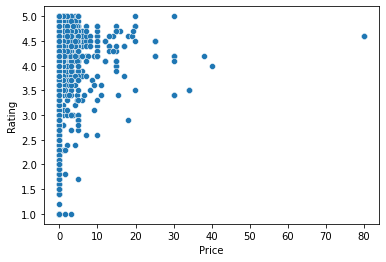

In [80]:
# Scatter plot for Rating v Price
sns.scatterplot(data=newdf, x='Price', y='Rating')

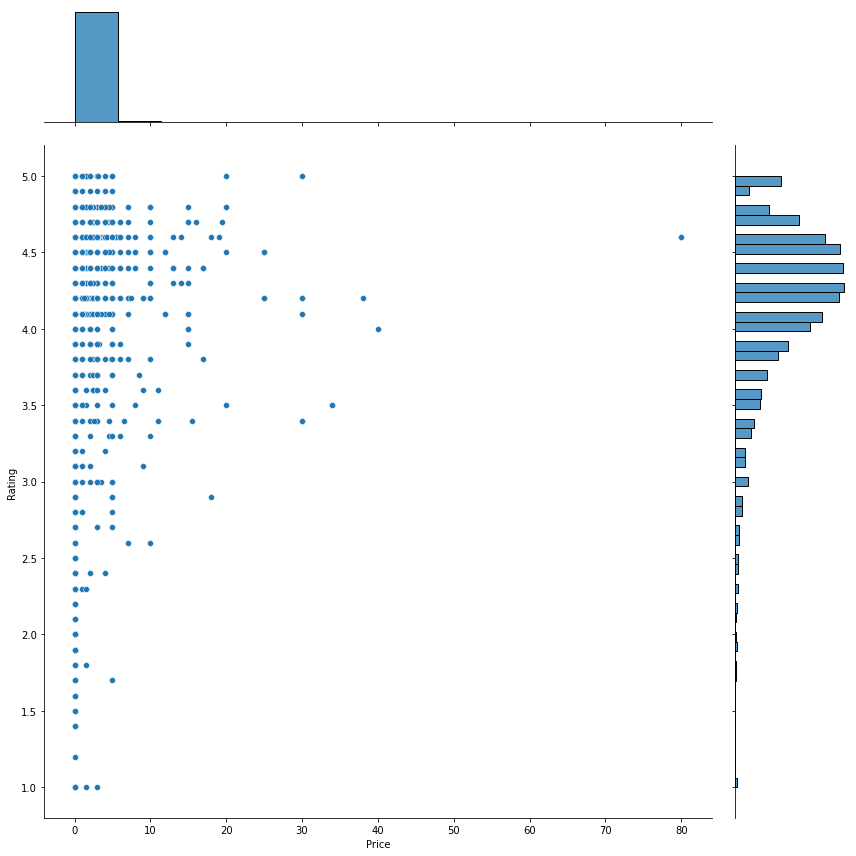

In [81]:
# Jointplot for Rating v Price
sns.jointplot(data=newdf, x='Price', y='Rating', height=12)

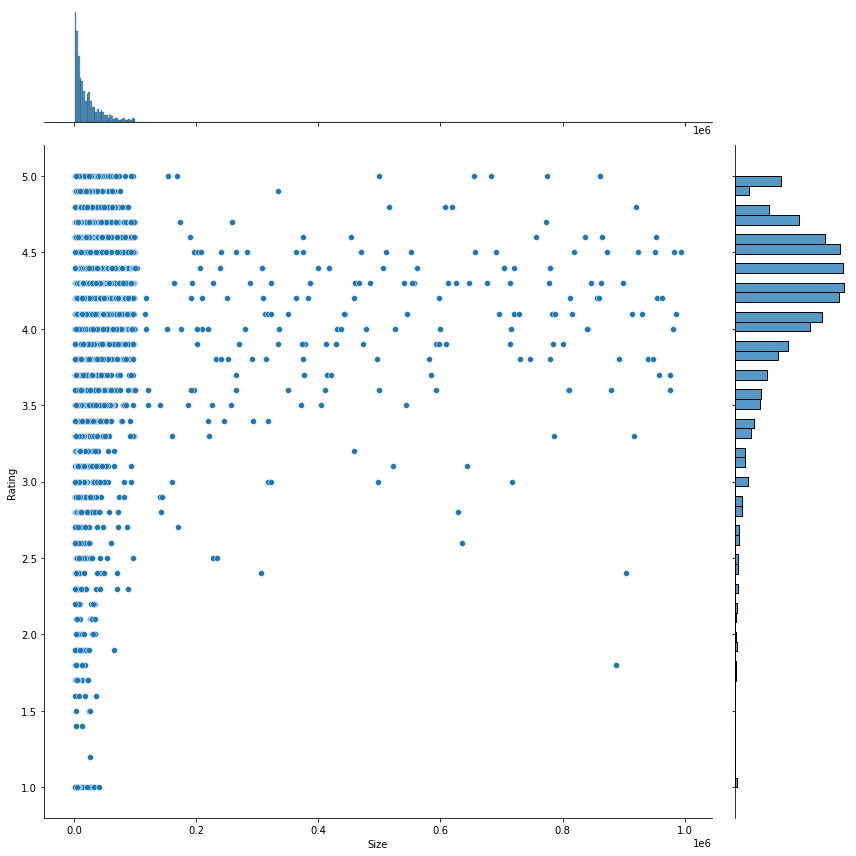

In [82]:
# Jointplot for Rating v Size
sns.jointplot(data=newdf, x='Size', y='Rating', height=12)

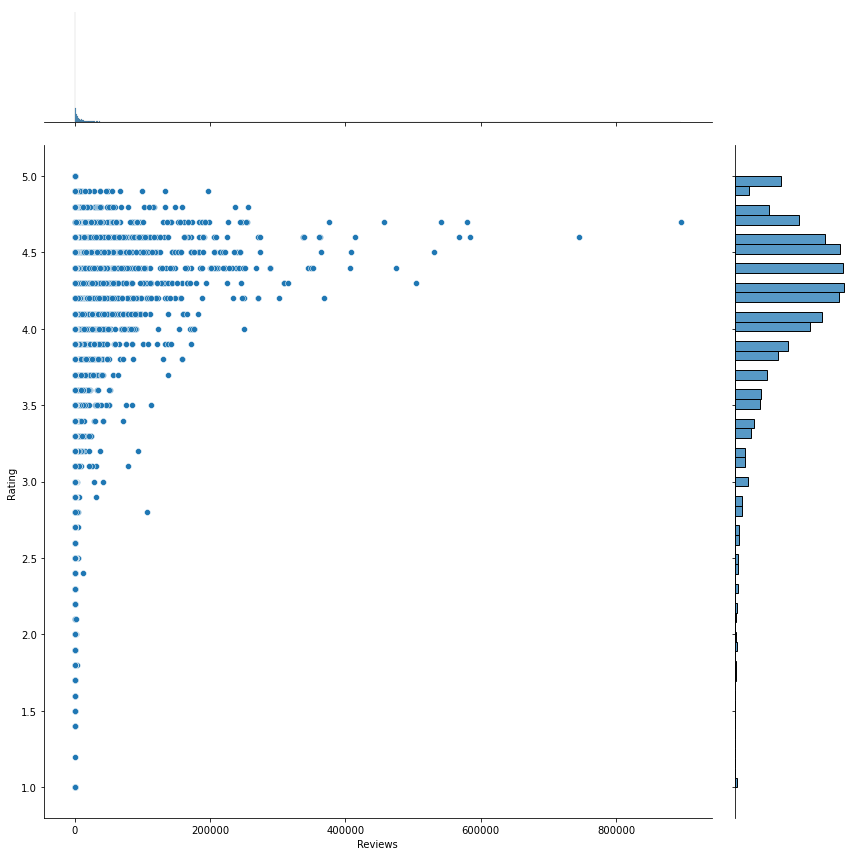

In [83]:
# Jointplot for Rating v Reviews
sns.jointplot(data=newdf, x='Reviews', y='Rating', height=12)

<AxesSubplot:xlabel='Rating', ylabel='Content_Rating'>

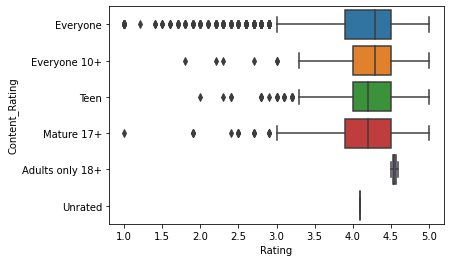

In [84]:
# Boxplot for Rating v Reviews
sns.boxplot(data=newdf, x='Rating', y='Content_Rating', orient='h')

<AxesSubplot:xlabel='Rating', ylabel='Category'>

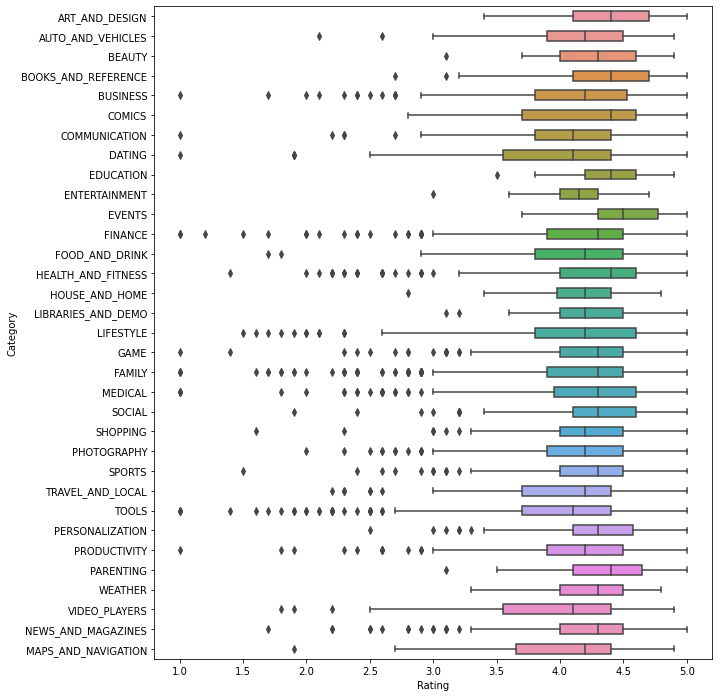

In [85]:
# Boxplot for Rating v Category
ax = plt.subplots(figsize=(10, 12))
sns.boxplot(data=newdf, x='Rating', y='Category', orient='h', width=.5)


# Step 8
Data Preprocessing

In [86]:
inp1 = newdf

In [87]:
inp1.Reviews

0         159
1         967
2       87510
3         967
4         167
        ...  
6484     1195
6485       44
6486        7
6487       38
6488        4
Name: Reviews, Length: 6489, dtype: int64

In [88]:
# Apply log transformation np.log1p on 'Reviews'
inp1.Reviews = np.log1p(inp1.Reviews)

In [89]:
inp1.Reviews

0        5.075174
1        6.875232
2       11.379520
3        6.875232
4        5.123964
          ...    
6484     7.086738
6485     3.806662
6486     2.079442
6487     3.663562
6488     1.609438
Name: Reviews, Length: 6489, dtype: float64

In [90]:
# Apply log transformation np.log1p on 'Installs'
inp1.Installs = np.log1p(inp1.Installs)

In [91]:
inp1.Installs

0        9.210440
1       13.122365
2       15.424949
3       11.512935
4       10.819798
          ...    
6484    11.512935
6485     6.908755
6486     6.216606
6487     8.517393
6488     4.615121
Name: Installs, Length: 6489, dtype: float64

In [92]:
inp1.Android_Ver

0       4.0.3 and up
1       4.0.3 and up
2       4.0.3 and up
3         4.4 and up
4         2.3 and up
            ...     
6484      2.1 and up
6485      2.2 and up
6486      4.1 and up
6487      4.1 and up
6488      4.1 and up
Name: Android_Ver, Length: 6489, dtype: object

In [93]:
inp1 = inp1.drop(columns=['App', 'Last_Updated', 'Current_Ver', 'Android_Ver'])

In [94]:
inp2 = pd.get_dummies(inp1, columns=['Category', 'Genres', 'Content_Rating'])

In [95]:
inp2

,Rating,Reviews,Size,Installs,Type,Price,Size_binned,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content_Rating_Adults only 18+,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated
0,4.1,5.075174,19000.0,9.210440,Free,0.0,Low,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,6.875232,14000.0,13.122365,Free,0.0,Low,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,11.379520,8700.0,15.424949,Free,0.0,Low,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.3,6.875232,2800.0,11.512935,Free,0.0,Low,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.4,5.123964,5600.0,10.819798,Free,0.0,Low,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6484,3.8,7.086738,582000.0,11.512935,Free,0.0,Medium,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6485,4.8,3.806662,619000.0,6.908755,Free,0.0,Medium,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6486,4.0,2.079442,2600.0,6.216606,Free,0.0,Low,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6487,4.5,3.663562,53000.0,8.517393,Free,0.0,Low,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Step 9
Train test split and apply 70-30 split. Name the new dataframes df_train and df_test

In [96]:
# Target data frame
df_test = inp2[['Rating']]

In [97]:
df_test.columns

Index(['Rating'], dtype='object')

In [98]:
# Training data frame
df_train = inp2.drop(columns=['Rating', 'Type', 'Size_binned'])

In [99]:
inp2.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Size_binned',
       'Category_ART_AND_DESIGN', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY',
       ...
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word', 'Content_Rating_Adults only 18+',
       'Content_Rating_Everyone', 'Content_Rating_Everyone 10+',
       'Content_Rating_Mature 17+', 'Content_Rating_Teen',
       'Content_Rating_Unrated'],
      dtype='object', length=154)

# Step 10

In [100]:
# Clean up data; Drop bin features used for visual analysis.


Seperate the dataframes into X_train, y_train, X_test, y_test.
Now we randomly split our data into training and testing data  using the function <b>train_test_split</b>. 

In [101]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.30, random_state=1)


print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])


number of test samples : 1947
number of training samples: 4542


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 10% of the total dataset. 

In [102]:
#df_train.to_excel('features_to_train.xlsx')

# Step 11

Let's import <b>LinearRegression</b> from the module <b>linear_model</b>.

In [103]:
from sklearn.linear_model import LinearRegression

 We create a Linear Regression object:

In [104]:
lre=LinearRegression()

we fit the model

In [105]:
lre.fit(X_train, y_train)

LinearRegression()

Let's Calculate the R^2 on the test data:

Let's Calculate the R^2 on the train data:

In [106]:
lre.score(X_train, y_train)

0.14443326563612902

we can see the R^2 is much smaller using the test data.

# Model evaluation

# Step 12
Make predictions on the test set and report R^2

In [107]:
test_pred = lre.predict(X_test)
test_pred

array([[3.50293601],
       [3.76182455],
       [4.25858487],
       ...,
       [4.4644869 ],
       [3.93302667],
       [4.01023783]])

In [108]:
# Function cross_val_predict()
# It returns the prediction that was obtained for each element when it was in the test set.
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre, df_train, df_test, cv=3)

In [109]:
df_test.head

<bound method NDFrame.head of       Rating
0        4.1
1        3.9
2        4.7
3        4.3
4        4.4
...      ...
6484     3.8
6485     4.8
6486     4.0
6487     4.5
6488     5.0

[6489 rows x 1 columns]>

In [110]:
# Function cross_val_score()
# funtion returns an array of scores (one for each partition chosen for testing set)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lre, df_train, df_test, cv=3)

In [111]:
scores

array([-0.14250109,  0.11297542,  0.07520949])

In [112]:
# estimate out-of-sample R2
np.mean(scores) 

0.015227942902055128

Let's Calculate the R^2 on the test data:

In [113]:
lre.score(X_test, y_test)

0.1273487040702337

# Step 13 
How do the following features influence Rating?
Price, Size, Reviews, Content_Rating, Category

In [117]:
# Find corr between Rating, Price, Size, Reviews, Content_Rating, Category
target_features = inp1[['Rating', 'Price', 'Size', 'Reviews']].corr()
target_features

,Rating,Price,Size,Reviews
Rating,1.000000,0.030829,-0.022102,0.125817
Price,0.030829,1.000000,0.008905,-0.077805
Size,-0.022102,0.008905,1.000000,-0.021664
Reviews,0.125817,-0.077805,-0.021664,1.000000


In [120]:
# Lets fit and score the R2 for 'Reviews' feature
lre_reviews = LinearRegression()

In [121]:
# we fit the model using the feature 'Reviews'
lre_reviews.fit(X_train[['Reviews']], y_train)

LinearRegression()

In [123]:
# Let's Calculate the R^2 on the test data:
lre_reviews.score(X_test[['Reviews']], y_test)

0.0019257914270257581

In [132]:
# Let's Calculate the R^2 on the train data:
lre_reviews.score(X_train[['Reviews']], y_train)

0.021004637997910636

In [124]:
# Lets fit and score the R2 for 'Price' feature
lre_price = LinearRegression()

In [126]:
# we fit the model using the feature 'Price'
lre_price.fit(X_train[['Price']], y_train)

LinearRegression()

In [127]:
# Let's Calculate the R^2 on the test data:
lre_price.score(X_test[['Price']], y_test)

0.0010334824827997746

In [131]:
# Let's Calculate the R^2 on the train data:
lre_price.score(X_train[['Price']], y_train)

0.0009086995552048949

In [128]:
# Lets fit and score the R2 for 'Size' feature
lre_size = LinearRegression()

In [129]:
# we fit the model using the feature 'Price'
lre_size.fit(X_train[['Size']], y_train)

LinearRegression()

In [130]:
# Let's Calculate the R^2 on the test data:
lre_size.score(X_test[['Size']], y_test)

-8.554626036261226e-05

<h2>Cross-validation Score</h2>